In [1]:
#Xu li Methylene blue tu 0.03mM den 0.005mM

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import rotate
from PIL import Image
import scipy.ndimage

filepath = 'D:\DataE\\20190701\CA\\'

In [2]:
#Pre-process Data

fname1 = filepath + "1.jpg"
img1 = mpimg.imread(fname1)
fname2 = filepath + "1.jpg"
img2 = mpimg.imread(fname2)
fname3 = filepath + "1.jpg"
img3 = mpimg.imread(fname3)
fname4 = filepath + "1.jpg"
img4 = mpimg.imread(fname4)
fname5 = filepath + "1.jpg"
img5 = mpimg.imread(fname5)
fname6 = filepath + "1.jpg"
img6 = mpimg.imread(fname6)

In [3]:
#Parameter
ghxd = 3000 # gioi han x duoi
ghxt = 5000 # gioi han x tren
dd = ghxt - ghxd + 1
dr = 10 # do rong chia 2
y1 = 837
y2 = 1056
y3 = 1341
y4 = 1566
y5 = 1848
y6 = 2076
goc12 = 181.5
goc34 = 181.5
goc56 = 181.5

In [4]:
#Kenh1 va Kenh2
xoay1 = rotate(img1, goc12)
base_xoay1 = np.dot(xoay1[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay1, (y1 - dr + i, ghxd), (y1 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh1b = ty

del x

xoay2 = rotate(img2, goc12)
base_xoay2 = np.dot(xoay2[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay2, (y2 - dr + i, ghxd), (y2 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh2b = ty

del x

In [5]:
#Kenh3 va Kenh4
xoay3 = rotate(img3, goc34)
base_xoay3 = np.dot(xoay3[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay3, (y3 - dr + i, ghxd), (y3 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh3b = ty

del x

xoay4 = rotate(img4, goc34)
base_xoay4 = np.dot(xoay4[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay4, (y4 - dr + i, ghxd), (y4 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh4b = ty

del x

In [6]:
#Kenh5 va Kenh6
xoay5 = rotate(img5, goc56)
base_xoay5 = np.dot(xoay5[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay5, (y5 - dr + i, ghxd), (y5 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh5b = ty

del x

xoay6 = rotate(img6, goc56)
base_xoay6 = np.dot(xoay6[...,:3], [100, 100, 100])

x = np.zeros((dr*2,dd))
for i in range(0, dr*2):
    x[i] = measure.profile_line(base_xoay6, (y6 - dr + i, ghxd), (y6 - dr + i, ghxt))

ty = np.mean(x, axis = 0)
kenh6b = ty

del x

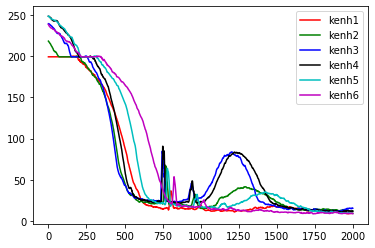

In [7]:
plt.plot(kenh1b,'r',label='kenh1')
plt.plot(kenh2b,'g',label='kenh2')
plt.plot(kenh3b,'b',label='kenh3')
plt.plot(kenh4b,'k',label='kenh4')
plt.plot(kenh5b,'c',label='kenh5')
plt.plot(kenh6b,'m',label='kenh6')
plt.legend(loc='upper right')
plt.show()

In [8]:
solieu = np.column_stack((kenh1b, kenh2b, kenh3b, kenh4b, kenh5b, kenh6b))
filename = 'calibrate.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)